   CustomerID  Annual Income  SpendingScore
0           1             15             39
1           2             15             81
2           3             16              6
3           4             16             77
4           5             17             40
Annual Income    0
SpendingScore    0
dtype: int64


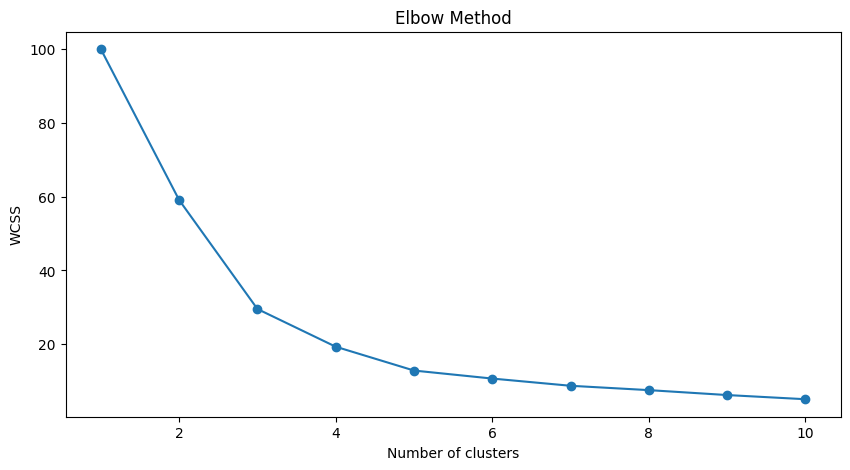

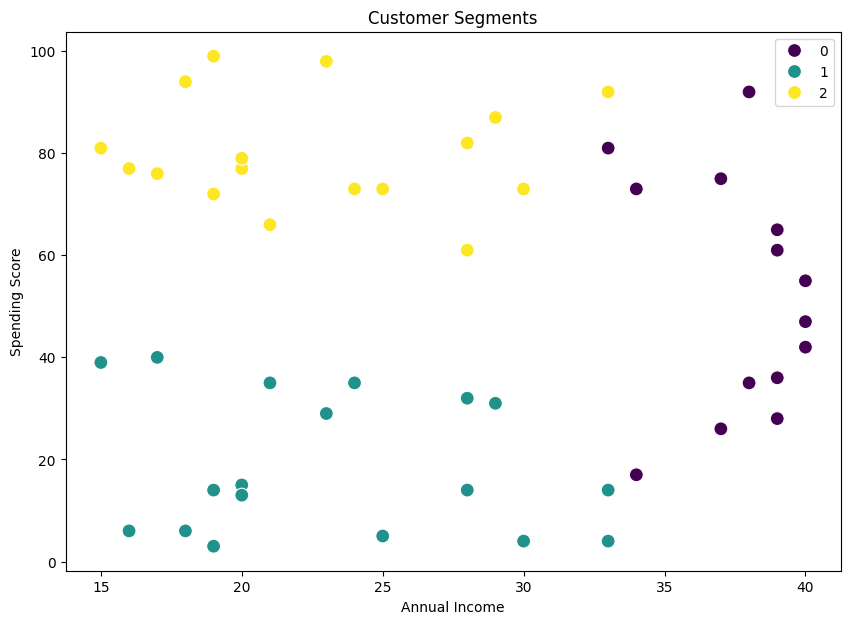

Silhouette Score: 0.46251114183487274


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/customer_data.csv'  # Update this to your actual file path
data = pd.read_csv('/content/customer_data.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Select relevant features for clustering
features = ['Annual Income', 'SpendingScore']  # Update this based on your dataset

# Check for missing values
print(data[features].isnull().sum())

# Handle missing values (for simplicity, we'll drop rows with missing values)
data = data.dropna(subset=features)

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the Elbow plot, let's choose 3 clusters (this is an example, choose based on your plot)
n_clusters = 3

# Apply K-means to the dataset
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data['Annual Income'], y=data['SpendingScore'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Evaluate the clustering using silhouette score
sil_score = silhouette_score(data_scaled, clusters)
print(f'Silhouette Score: {sil_score}')
